завдання (1)

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def get_data(data_path: str):
    data = pd.read_csv(data_path)
    return data
data = get_data(data_path="motorbike_ambulance_calls.csv")
print("Статистична інформація по числовим змінним:")
print(data.describe())
print()

print("Максимальні значення по змінним:")
print(data.max())
print()

print("Мінімальні значення по змінним:")
print(data.min())
print()

print("Розмірність датасету:")
print(data.shape)


Статистична інформація по числовим змінним:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      

завдання (2)

In [81]:
print(f"Типи даних та кількість змінних:\n{data.dtypes}")



Типи даних та кількість змінних:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


завдання (3)

In [106]:
print(f"Загальна кількість пропущених значень:\n{data.isnull().sum()}")


Загальна кількість пропущених значень:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


1) Дізнався  максимальльні і мінімальні значення по кожній змінній.
2) Дізнався типи даних та кількість даних по кожній змінній.
3) Перевірив чи немає пропусків. 

завдання (4)

In [83]:
def transform_and_get_time_limits(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"The first date in the dataset: {first_day}.\nThe last date in the dataset: {last_day}")
transform_and_get_time_limits(data, 'date')


The first date in the dataset: 2011-01-01 00:00:00.
The last date in the dataset: 2012-12-31 00:00:00


C:\Users\Вася\AppData\Local\Temp\ipykernel_30796\112531946.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


???

завдання (5)

In [84]:

data_categories = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
categorical_data = data[data_categories]
print(categorical_data.head())
categorical_data.to_csv("categor_data.csv", index=False)

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit
0  spring   0     1   0        0        6           0           1
1  spring   0     1   1        0        6           0           1
2  spring   0     1   2        0        6           0           1
3  spring   0     1   3        0        6           0           1
4  spring   0     1   4        0        6           0           1


завдання (6)

In [85]:
def encode_seasons(df: pd.DataFrame, season_col: str):
    seasons_mapping = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
    df[season_col] = df[season_col].map(seasons_mapping)
    return df
data = encode_seasons(data, 'season')
print(data['season'].unique()) 

[1 2 3 4]


завдання (7)

C:\Users\Вася\AppData\Local\Temp\ipykernel_30796\1386995132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, ax=subplot, palette=['pink', 'green'])
C:\Users\Вася\AppData\Local\Temp\ipykernel_30796\1386995132.py:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=variable, data=data, ax=subplot, palette=['pink', 'green'])
C:\Users\Вася\AppData\Local\Temp\ipykernel_30796\1386995132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, ax=subplot, palette=['pink', 'green'])
C:\Users\Вася\AppData\Local\Temp\ipykernel_30796\1386995132.py:3: FutureWar

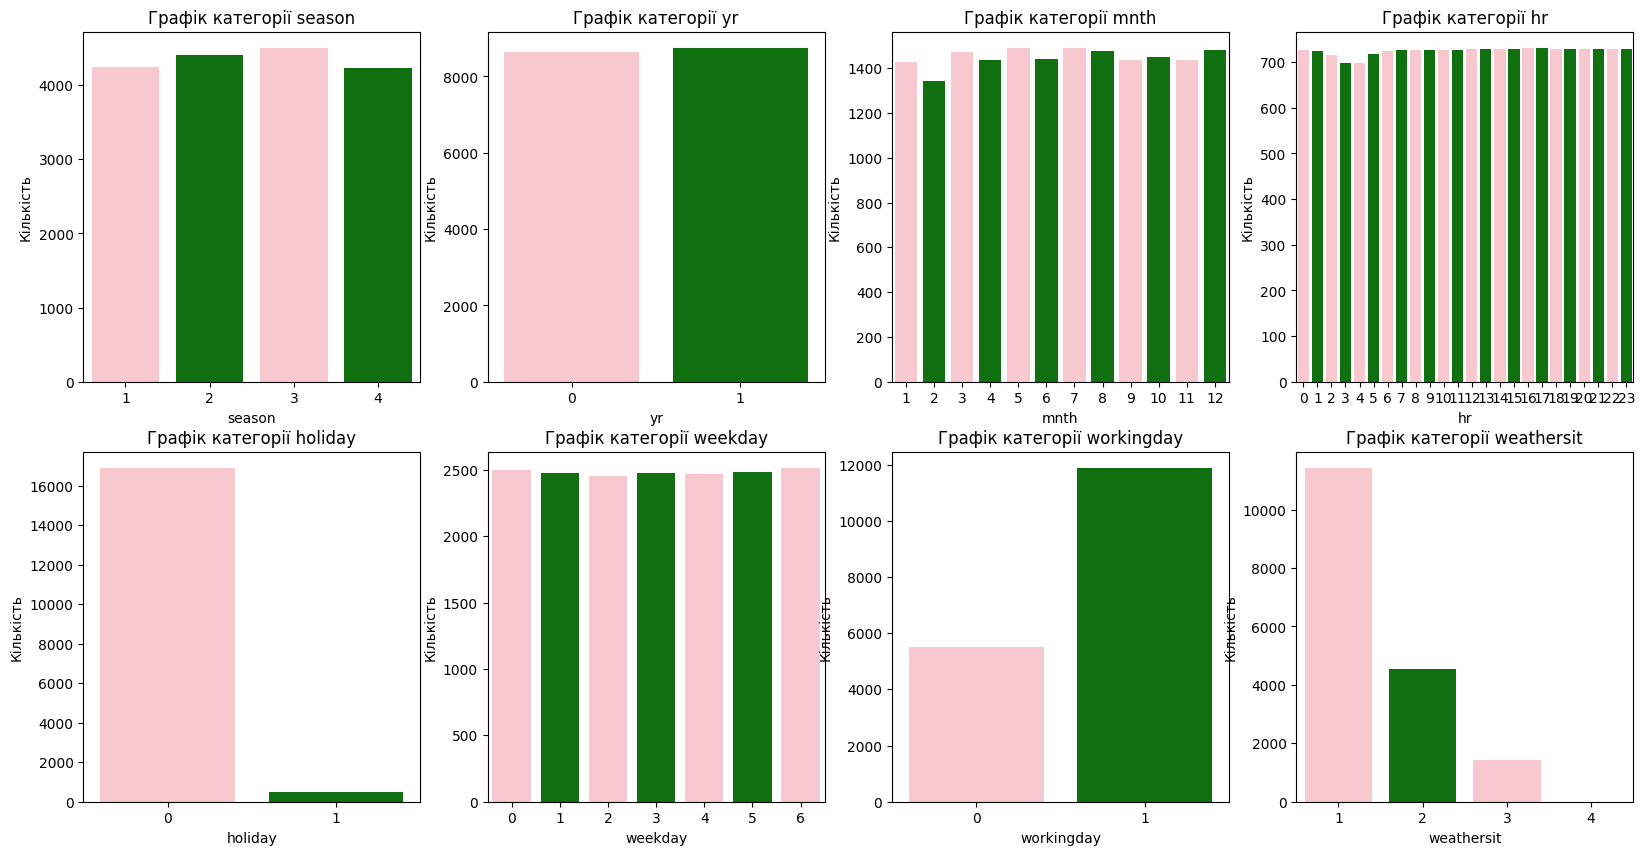

In [86]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, (variable, subplot) in enumerate(zip(data_categorical.columns, ax.flatten())):
    sns.countplot(x=variable, data=data, ax=subplot, palette=['pink', 'green'])
    subplot.set_title(f'Графік категорії {variable}')
    subplot.set_xlabel(variable)
    subplot.set_ylabel('Кількість')
plt.show()


1) Побудував графіки також виділив змінні в окремий датасет.

завдання (8)

In [104]:
numerical_vars = ['temp', 'hum', 'windspeed', 'cnt']
data_numerical = data[numerical_vars]
print("Перші 5 рядків числових змінних:")
print(data_numerical.head(5))
data_numerical.to_csv("numerical_data.csv", index=False)


Перші 5 рядків числових змінних:
   temp   hum  windspeed  cnt
0  0.24  0.81        0.0   16
1  0.22  0.80        0.0   40
2  0.22  0.80        0.0   32
3  0.24  0.75        0.0   13
4  0.24  0.75        0.0    1


завдання (9)

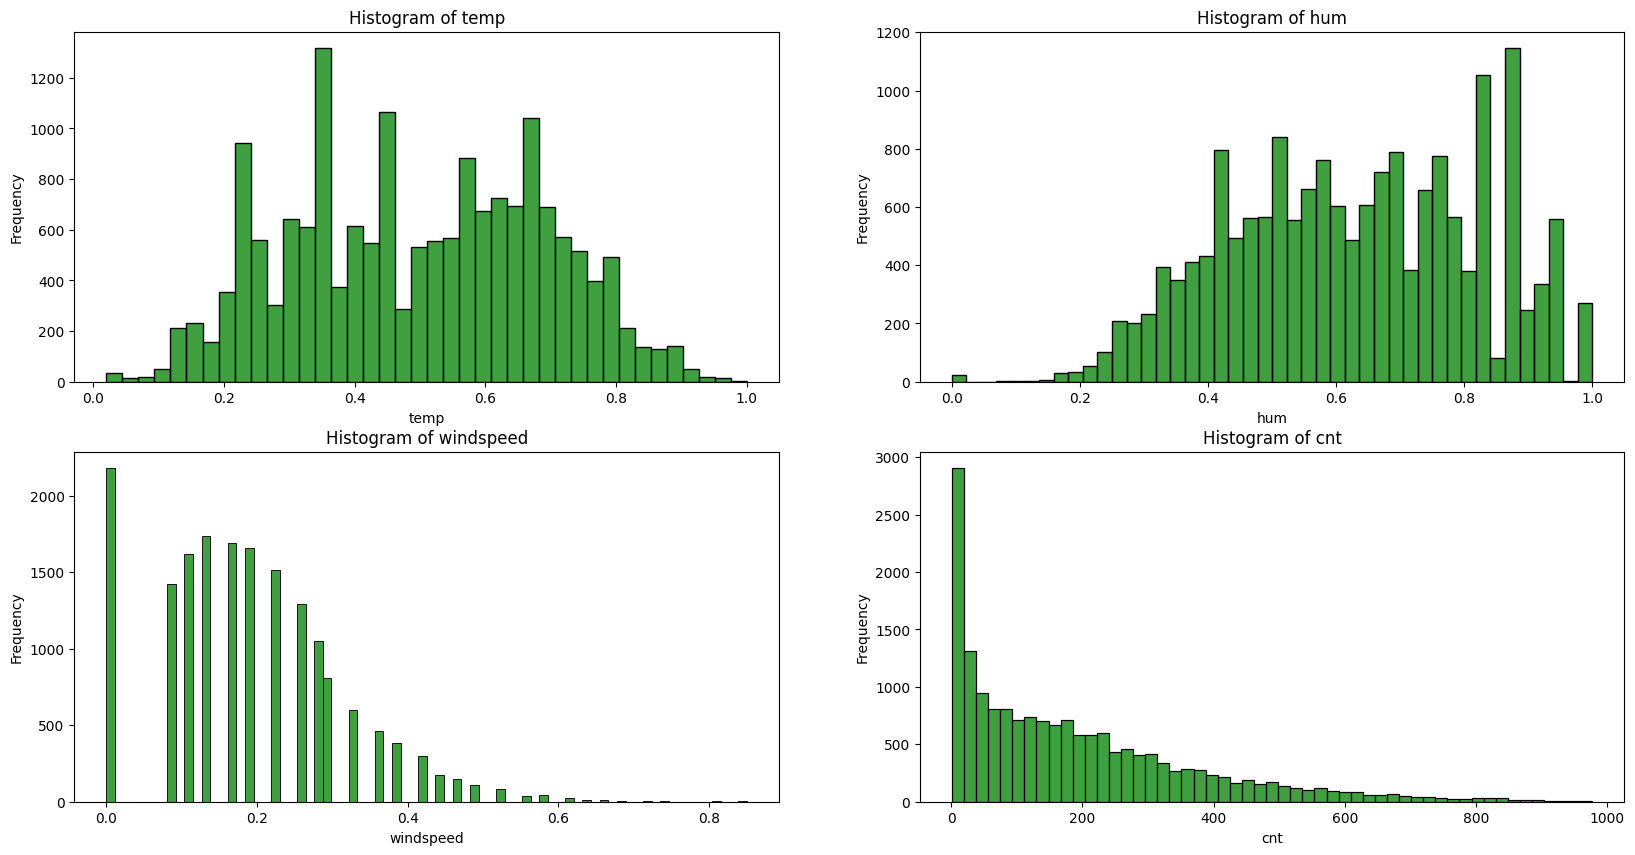

In [105]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, (variable, subplot) in enumerate(zip(data_numerical.columns, ax.flatten())):
    sns.histplot(x=variable, data=data, ax=subplot, color='green')
    subplot.set_title(f'Histogram of {variable}')
    subplot.set_xlabel(variable)
    subplot.set_ylabel('Frequency')
plt.show()


завдання (10)

Skewness: 1.2774116037490577


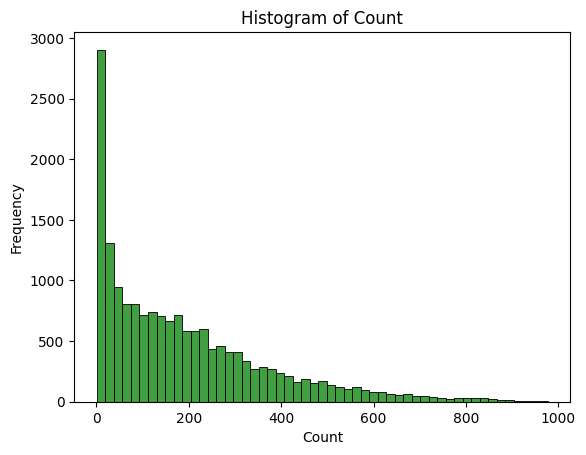

In [89]:
sns.histplot(data=data['cnt'], color='green')
coefficient_skew = data['cnt'].skew()
print("Skewness:", coefficient_skew)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Count')
plt.show()


1) Побудував гістаграму розподілу, яка є біномінальною.
2) Коофіцієнт нахилу є більшим 0, це означає що більшість даних зосереджені ліворуч від середнього значення. 

завдання (11)

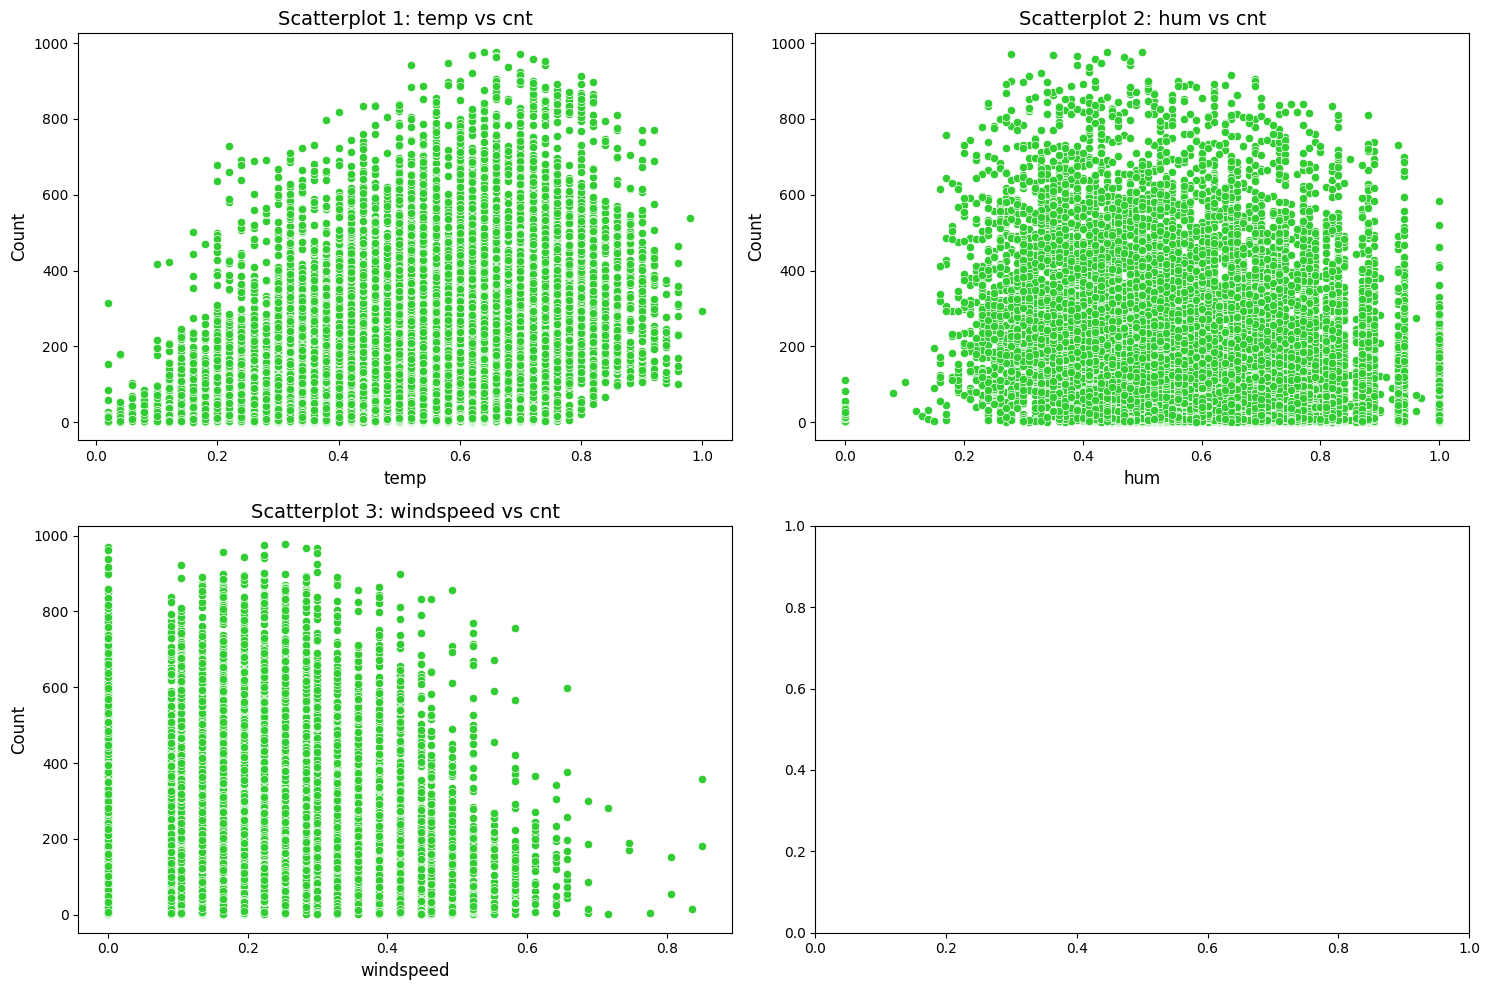

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, (variable, subplot) in enumerate(zip(data_numerical.drop('cnt', axis=1), axes.flatten()), start=1):
    sns.scatterplot(x=variable, y='cnt', data=data_numerical, ax=subplot, color='limegreen')
    subplot.set_title(f'Scatterplot {i}: {variable} vs cnt', fontsize=14)
    subplot.set_xlabel(variable, fontsize=12)
    subplot.set_ylabel('Count', fontsize=12)
plt.show()



завдання (12)

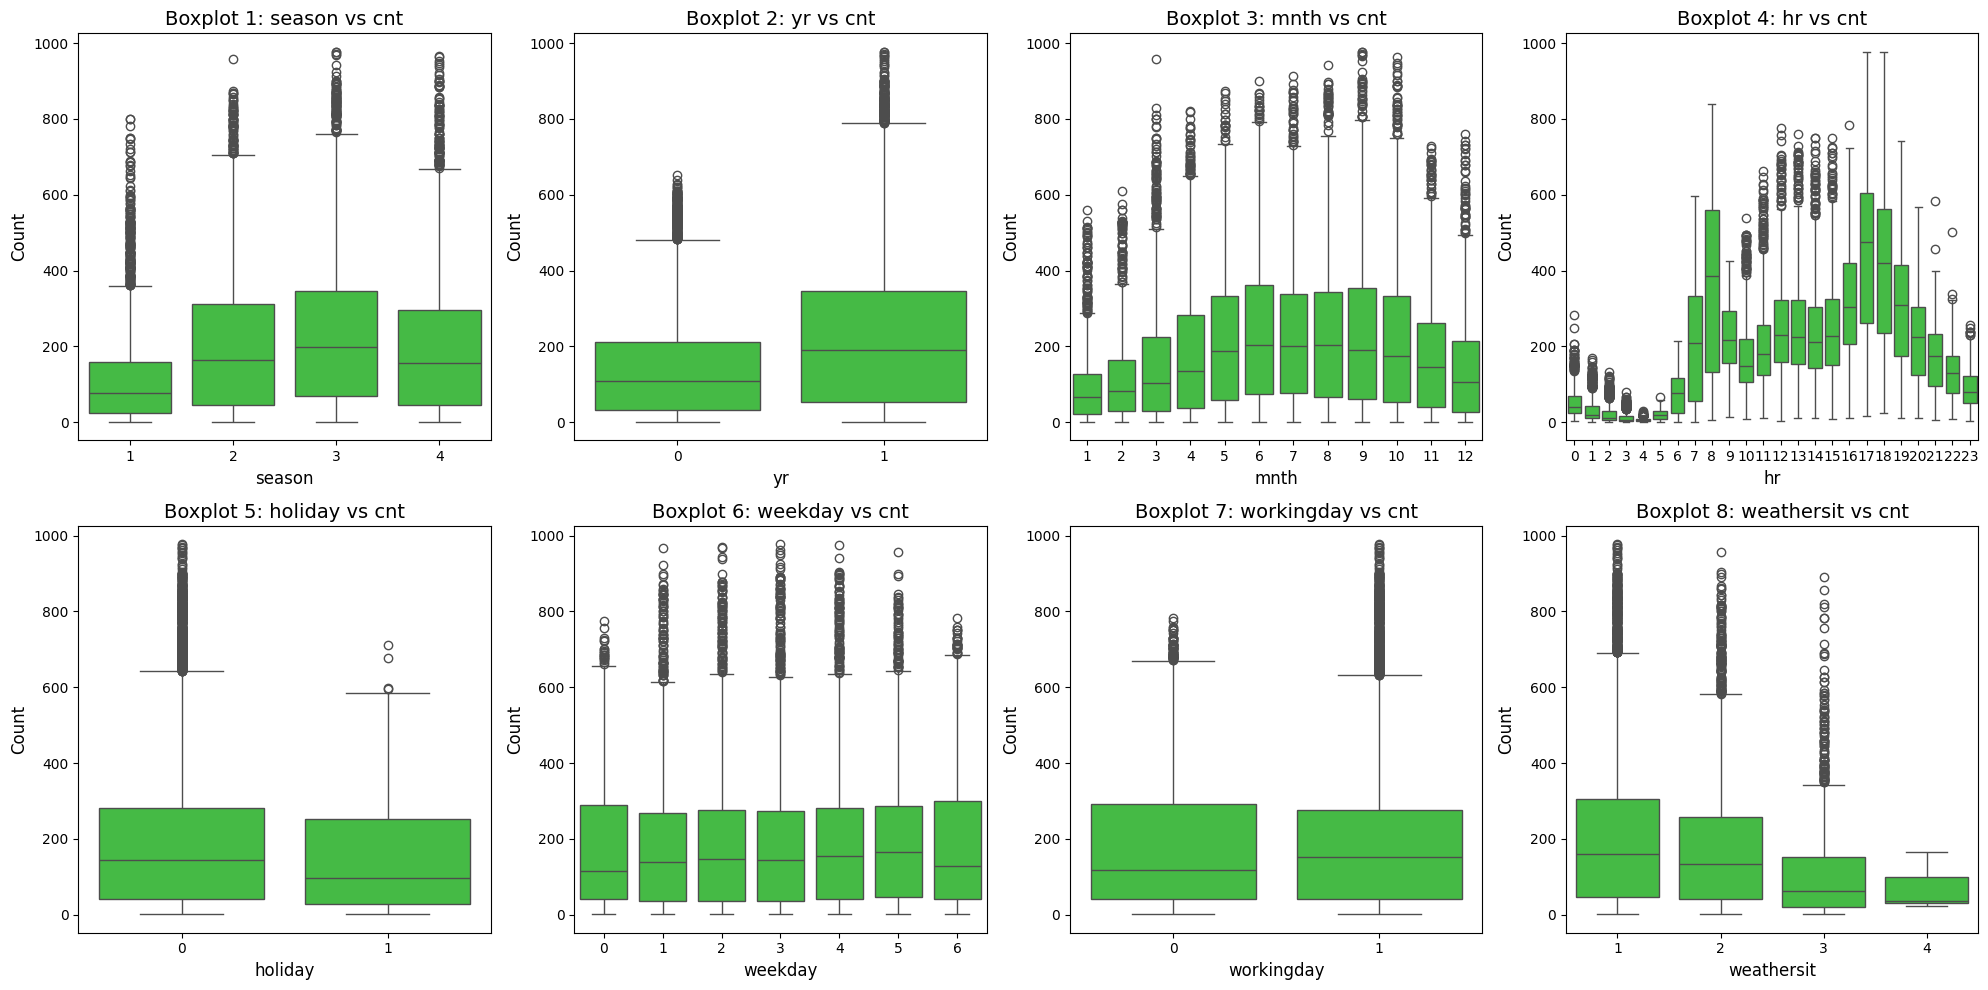

In [100]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, (variable, subplot) in enumerate(zip(data_categorical.columns, axes.flatten()), start=1):
    sns.boxplot(x=data[variable], y=data['cnt'], ax=subplot, color='limegreen')
    subplot.set_title(f'Boxplot {i}: {variable} vs cnt', fontsize=14)
    subplot.set_xlabel(variable, fontsize=12)
    subplot.set_ylabel('Count', fontsize=12)
plt.show()


1) Аналіз графіків показав, що збільшення температури повітря сприяє більшій кількості викликів. Швидкість вітру майже не впливає на цю кількість. Також відмічено, що при відсутності вітру кількість викликів зростає.
2)  Виклики найчастіше спостерігаються в певний період доби, зокрема, під час годин пік вранці та вечором, що відповідає годинам дороги на роботу.

завдання (13)

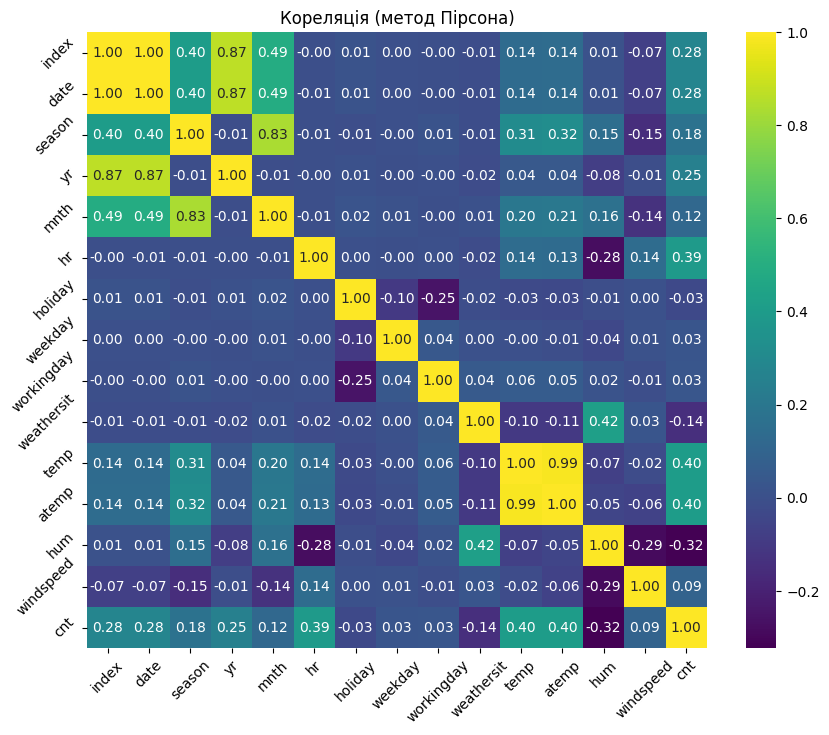

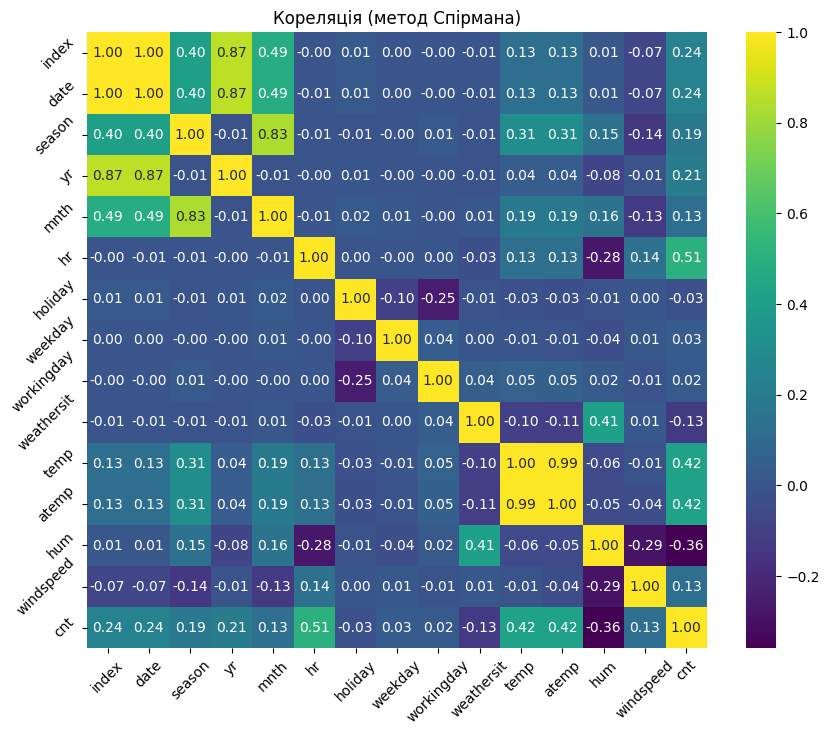

In [111]:
pearson = data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(pearson, annot=True, cmap='viridis', fmt=".2f")
plt.title("Кореляція (метод Пірсона)")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



spearman = data.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearman, annot=True, cmap='viridis', fmt=".2f")
plt.title("Кореляція (метод Спірмана)")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



Коефіцієнт кореляції Пірсона використовується для вимірювання сили та напрямку лінійного зв'язку між двома змінними. У той час як коефіцієнт кореляції Спірмена оцінює ступінь монотонної залежності між двома змінними, не обмежуючись лінійним зв'язком.